In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 14.6 MB/s 


In [ ]:
!python -m spacy download es_core_news_md


2022-09-05 22:17:05.374012: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.3 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [ ]:
from io import IncrementalNewlineDecoder
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.utils import shuffle
import pandas as pd
import re
import numpy as np
import es_core_news_md
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import unidecode
import unicodedata
import warnings
warnings.filterwarnings('ignore')
#spacy
stop_words_spacy = list(STOP_WORDS)

print(stop_words_spacy)

['haber', 'queremos', 'sean', 'solas', 'cuantos', 'veces', 'misma', 'hago', 'igual', 'todos', 'poner', 'verdadera', 'consigue', 'días', 'encuentra', 'va', 'medio', 'luego', 'repente', 'tenido', 'hay', 'el', 'ultimo', 'tercero', 'sois', 'buena', 'mismos', 'llevar', 'otras', 'la', 'ante', 'total', 'tuyos', 'unos', 'después', 'vosotros', 'hacer', 'sé', 'anterior', 'habían', 'ahi', 'mencionó', 'estado', 'allí', 'tiene', 'habrá', 'alrededor', 'hace', 'enfrente', 'mias', 'era', 'doce', 'estaban', 'dijeron', 'mios', 'nosotros', 'asi', 'todas', 'hasta', 'mío', 'de', 'quienes', 'uso', 'añadió', 'vaya', 'tarde', 'ningún', 'estas', 'nuevo', 'sí', 'donde', 'propio', 'qué', 'siempre', 'sin', 'habia', 'lado', 'esos', 'cierto', 'nuestras', 'segun', 'cuáles', 'informó', 'ninguna', 'tambien', 'tras', 'ustedes', 'son', 'ningunas', 'más', 'última', 'alguno', 'fin', 'tus', 'hizo', 'atras', 'suyo', 'afirmó', 'fuimos', 'poder', 'deprisa', 'entre', 'le', 'para', 'sólo', 'vais', 'detras', 'podrá', 'pasada', '

In [ ]:
data = pd.read_csv('/OFFENDMEX_Dataset_ofe.csv')
data = data.drop_duplicates(subset=["Groserias"], keep=False)
data.head(15)

,Column1,Groserias,Vulgar,Agresivo,Ofensivo
0,0,"@karlarockabilly Pues yo jalo, trabajé en una ...",0,0,0
1,1,"Señores medios de prensa , ya dejen de entrevi...",0,0,1
2,2,@IsidroMZ @oscar_leonard @enriquegtejeda jajaj...,0,0,0
3,3,Lo que más me da gusto del tuit es la cantidad...,0,0,0
4,4,Hace 111 años nació en el DF uno de los mayore...,0,0,0
5,5,@aguilarpepe los trabajadores blancos al ser b...,0,0,0
6,6,'Balada de pájaros cantores y serpientes': la ...,0,0,0
7,7,'Balada de pájaros cantores y serpientes': la ...,0,0,0
8,8,Cuando ves a tu marido bien acaramelado con la...,0,0,0
9,9,@RicardoAnayaC Deja tu banderita de perseguido...,0,0,1


In [ ]:
#data = shuffle(data)
#data.head(15)


In [ ]:
# Removing stopwords in a string
palabras_parada = []
nlp = spacy.load('es_core_news_md')

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (palabras_parada)])
    return text
 
#Lemmatizing the text in a string
def lemmatize_text(text):
    text = [word.lemma_ for word in nlp(text)]
    text = ' '.join(text)
    return text


#substituting accents in a string
def remove_accents(text):
    
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    
    return text


#removing twitter users in a string
def remove_users(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())

    return text

#removing urls in a string
def remove_urls(text):
    text = re.sub(r'http\S+','',text)
    return text

# Text to lowercase in a string
def text_to_lowercase(text):
    text = text.lower()
    return text

#removing numbers in a string
def remove_numbers(text):
    text = re.sub(r'\d+','',text)
    return text


#removing special characters in a string
def remove_special_characters(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

for palabra in spacy.lang.es.stop_words.STOP_WORDS:
    palabras_parada.append(remove_accents(palabra))

# Cleaning the text
def clean_text(text):
    text = remove_accents(text)

    text = remove_users(text)
    
    text = remove_urls(text)
    
    text = remove_numbers(text)
    
    text = remove_special_characters(text)
    
    text = text_to_lowercase(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    #print(text)

    return text

data["Groserias"] = data["Groserias"].apply(clean_text)
data.head(15)
data.to_csv('out.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

tfidf = TfidfVectorizer(max_features=5000)
data = shuffle(data)
X = data['Groserias']
y = data['Vulgar']
X = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

clf = LinearSVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

dato = clean_text("huevos puto")

vec = tfidf.transform([dato])

print(clf.predict(vec))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       687
           1       0.88      0.66      0.75       282

    accuracy                           0.87       969
   macro avg       0.88      0.81      0.83       969
weighted avg       0.87      0.87      0.87       969

[1]


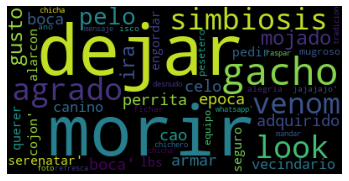

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = data['Groserias'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()